#  Models

## Imports 

In [1]:
#Directory Libraries
import sys, os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import glob
from os.path import join
#plotting libraries
import matplotlib.pylab as plt
from tqdm.notebook import tqdm
import seaborn as sns
#pre-processing 
import cv2
from numpy.random import seed
import pandas as pd
from PIL import Image
import numpy as np
#tensorflow
import tensorflow
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.backend as K
from tensorflow.keras import layers,Model
from tensorflow.keras import initializers, layers
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import layers, models, optimizers, Input
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
#tensorflow.device("GPU:0")
#parallel computing
from joblib import Parallel, delayed
import argparse
#Ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')
seed(101)
%matplotlib inline
#Make sure that plots are colorblindfriendly
plt.style.use("seaborn-colorblind")


In [2]:
Processed_datasets = {
    'train_dir': 'D:\\base__dir\\train_dir\\',
    'val_dir': 'D:\\base__dir\\val_dir\\'
}

In [3]:
df_train = pd.read_csv("C:\\Users\\Dio Gado\\Asmaa\\Minerva_Capstone\\Preprocess Data\\train_data_csv.csv")
df_val = pd.read_csv("C:\\Users\\Dio Gado\\Asmaa\\Minerva_Capstone\\Preprocess Data\\val_data_csv.csv")



In [5]:
num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10
train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)


In [6]:
datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(Processed_datasets['train_dir'],
                                        target_size=(244,244),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(Processed_datasets['val_dir'],
                                        target_size=(244,244),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

Found 4800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [7]:
model=Xception(include_top=False,
                 weights='imagenet',
                 input_shape=(244,244,3),pooling ='avg',
                 )
model.summary()


act[0][0]        
__________________________________________________________________________________________________
block5_sepconv1_bn (BatchNormal (None, 15, 15, 728)  2912        block5_sepconv1[0][0]            
__________________________________________________________________________________________________
block5_sepconv2_act (Activation (None, 15, 15, 728)  0           block5_sepconv1_bn[0][0]         
__________________________________________________________________________________________________
block5_sepconv2 (SeparableConv2 (None, 15, 15, 728)  536536      block5_sepconv2_act[0][0]        
__________________________________________________________________________________________________
block5_sepconv2_bn (BatchNormal (None, 15, 15, 728)  2912        block5_sepconv2[0][0]            
__________________________________________________________________________________________________
block5_sepconv3_act (Activation (None, 15, 15, 728)  0           block5_sepconv2_bn[0][0]  

In [7]:
base_model = Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(244, 244, 3),
    include_top=False,pooling ='avg')  # Do not include the ImageNet classifier at the top.

In [9]:
tensorflow.device('CPU2') 


In [8]:
inputs = Input(shape=(244, 244, 3))

for layer in base_model.layers:
    layer.trainable = True

x = base_model.output
predicted = Dense(2,activation ='softmax')(x)
model_pretrain = Model(base_model.input, predicted)
model_pretrain.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
          optimizer=Adam(lr = 0.01),
          metrics=['accuracy'])
pretraining_Xception =model_pretrain.fit(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=20, verbose=1)


Epoch 1/20
 55/480 [==>...........................] - ETA: 15:52 - loss: 0.6901 - accuracy: 0.5782

KeyboardInterrupt: 

In [11]:

plt.figure(figsize=(12,6),dpi=120)
plt.plot(pretraining_Xception.history['accuracy'], label=' Train Accuracy')
plt.plot(pretraining_Xception.history['val_accuracy'],label=' Validation Accuracy')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.title("CNN Model")
plt.legend()
plt.show()

NameError: name 'pretraining_Xception' is not defined

In [ ]:
model_pretrain.save("model_finetuned_xception.hdf5")

In [ ]:
import seaborn as sns
sns.set()

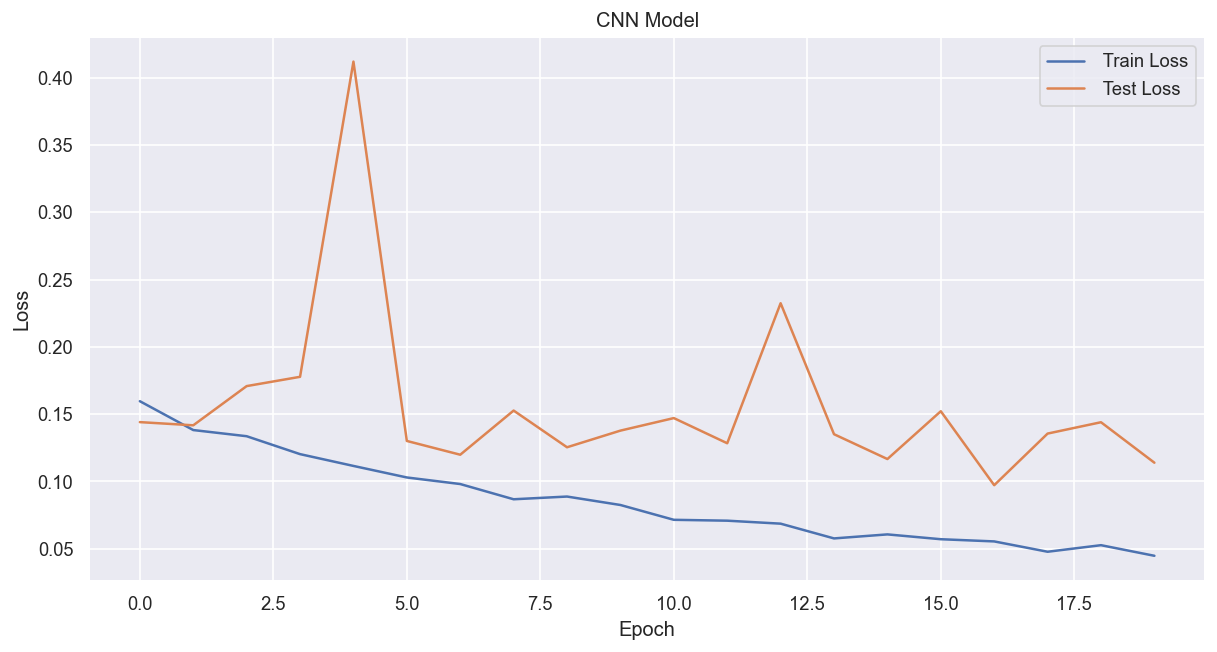

In [ ]:
plt.figure(figsize=(12,6),dpi=120)
plt.plot(pretraining_Xception.history['loss'], label=' Train Loss')
plt.plot(pretraining_Xception.history['val_loss'],label=' Test Loss')

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.title("CNN Model")
plt.legend()
plt.show()